In [1]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 다중회귀
from sklearn.preprocessing import PolynomialFeatures
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# Grid Search
from sklearn.model_selection import GridSearchCV
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier
# Gradient Boostring
from sklearn.ensemble import GradientBoostingClassifier
# Histogram gradient boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
# XGBoost
from xgboost import XGBClassifier
# Permutation Importance (치환중요도)
from sklearn.inspection import permutation_importance

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn import datasets

# 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
# 표준화
from sklearn.preprocessing import StandardScaler
# Lasso (L1)
from sklearn.linear_model import Lasso
# Ridge (L2)
from sklearn.linear_model import Ridge
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier

# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score
# Sigmoid
from scipy.special import expit
# SoftMax
from scipy.special import softmax
# KFold
from sklearn.model_selection import StratifiedKFold

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 비지도 학습
- Target이 없는 데이터 분류하기
- 군집화와 차원축소 있음.

---
### 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 분류하기

In [2]:
fruits = np.load('../Data/fruits.npy')
fruits.shape

(300, 100, 100)

> 흑백 이미지</br>
> 300개의 이미지가 100*100 픽셀로 구성되어 있음</br>
> 100개는 사, 100개는 파인애플, 100개는 바나나

In [4]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

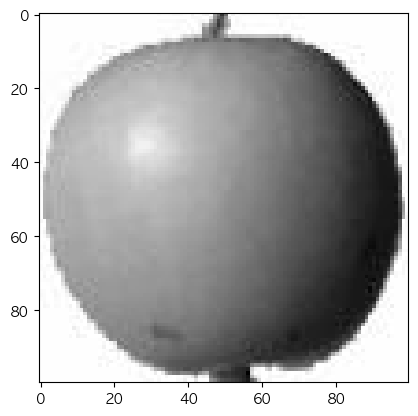

In [16]:
# 사과 이미지 보기
plt.imshow(fruits[1], cmap='gray_r')
plt.show()

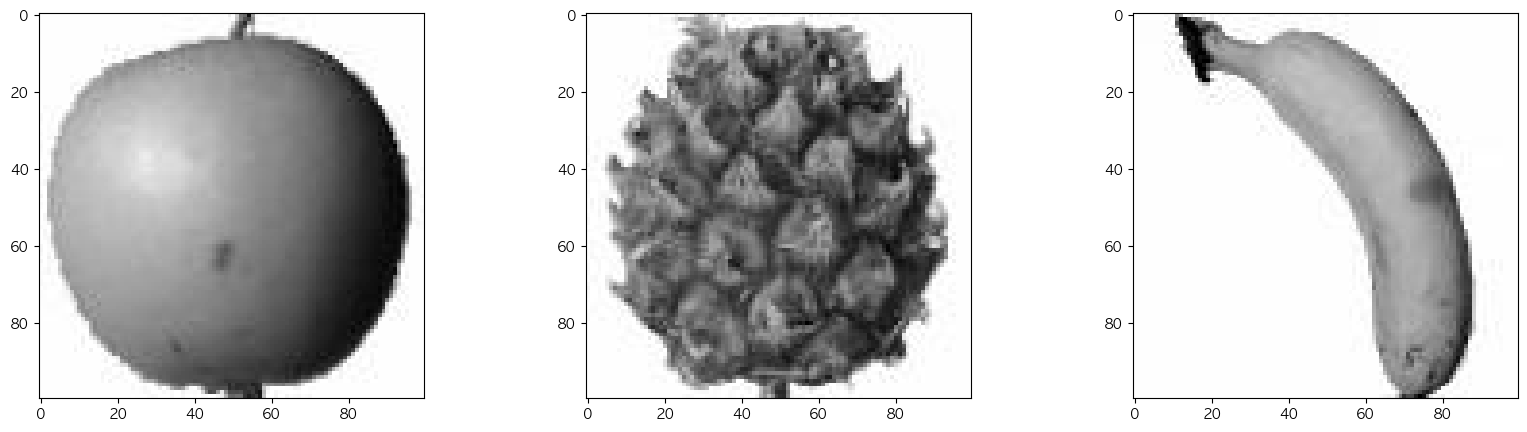

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(fruits[30], cmap='gray_r')
axs[1].imshow(fruits[176], cmap='gray_r')
axs[2].imshow(fruits[220], cmap='gray_r')

plt.show()

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경하기
- 배열중 page단의 수는 apple, pineapple, banana로 변경

In [28]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [22]:
apple.shape

(100, 10000)

### 픽셀 값 분석하기

In [29]:
# apple의 sample별(행별) 평균구하기
apple.mean(axis=1)

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

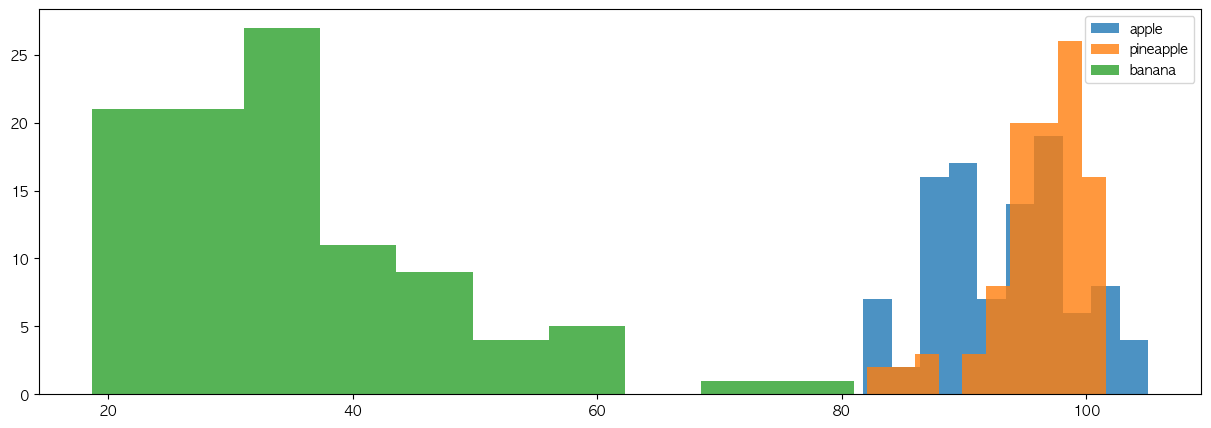

In [31]:
# 과일별 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15,5))
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple','pineapple','banana'])
plt.show()

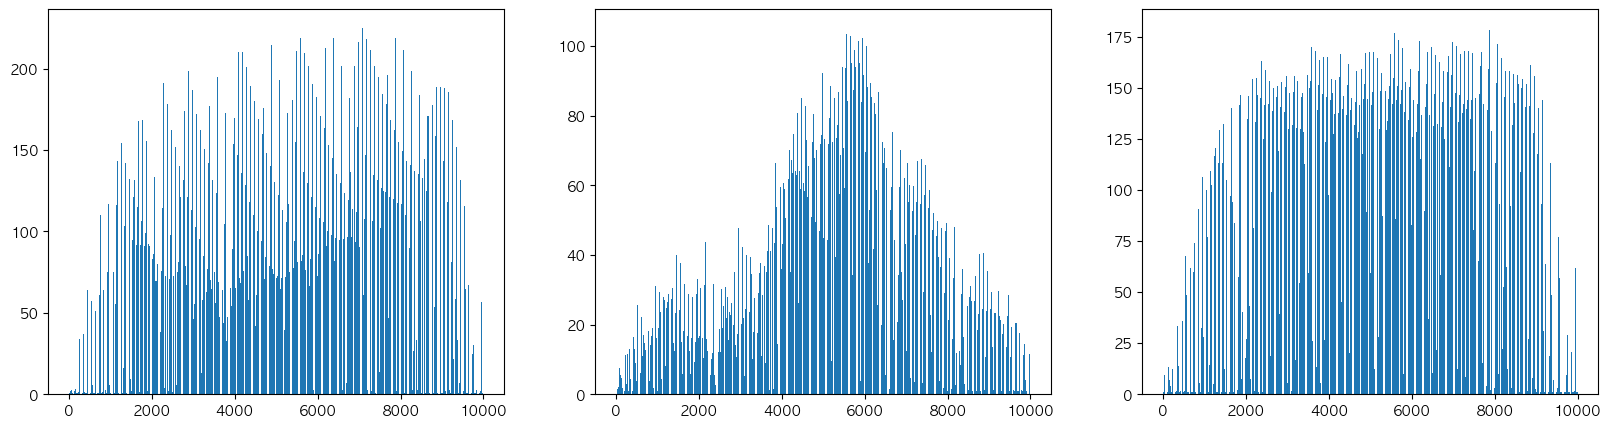

In [37]:
# Feature별 평균 막대 그래프
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(banana, axis=0))
axs[2].bar(range(10000), np.mean(pineapple, axis=0))

plt.show()

### 평균 이미지 그림 표현하기 : 2차원 배열로 변경

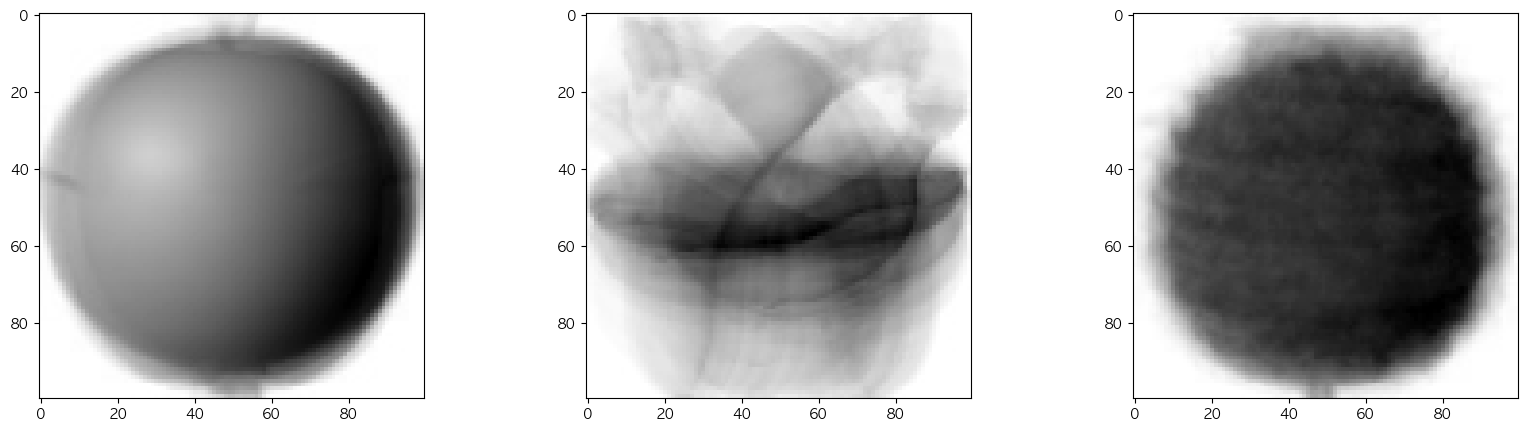

In [39]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(banana_mean, cmap='gray_r')
axs[2].imshow(pineapple_mean, cmap='gray_r')

plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.
- 사과만 잘 분류하는지 시도

In [42]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(0,1)) # abs_diff가 3차원이기때문에 Page차원을 제외하고 행과 열만 구한다.

In [43]:
abs_diff.shape # 300개의 원소로 이루어진 1차원 배열

(300, 100, 100)

In [44]:
# 300개의 데이터중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([ 0,  1, 99,  2,  3,  4, 98,  5,  6,  7,  8,  9, 10, 11, 97, 12, 13,
       14, 15, 16, 17, 18, 96, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 95,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 94, 42, 43, 44,
       45, 46, 51, 50, 47, 49, 52, 48, 59, 93, 53, 58, 60, 61, 57, 62, 54,
       63, 56, 64, 65, 55, 66, 67, 68, 69, 92, 70, 71, 72, 73, 74, 91, 88,
       89, 90, 87, 85, 86, 75, 84, 76, 83, 77, 79, 78, 81, 80, 82])

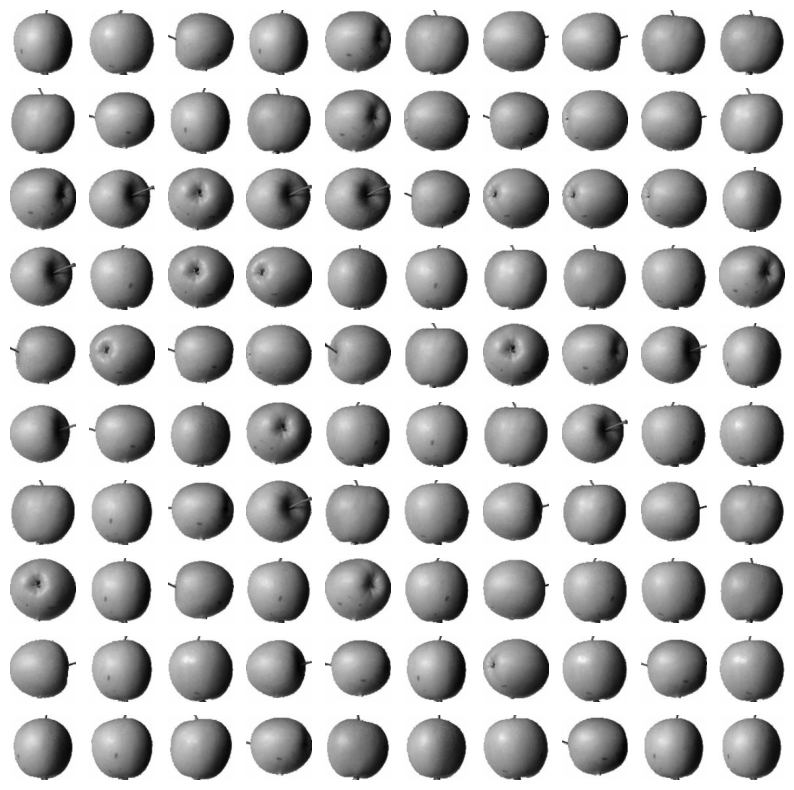

In [45]:
# 그림 그려보기
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

#### 바나나로 해보기

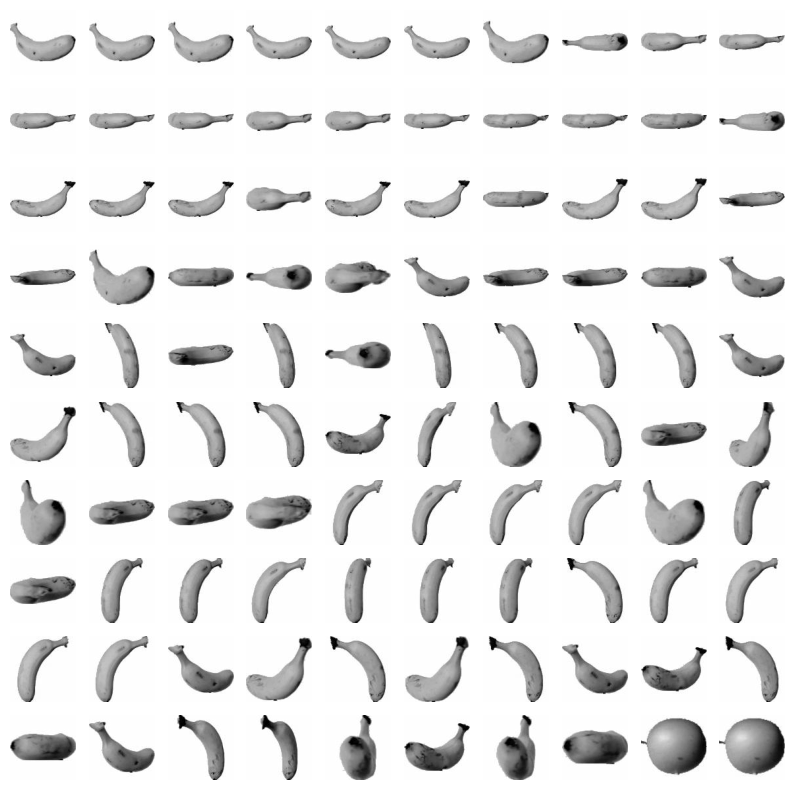

In [50]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2)) 
banana_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

#### 파일애플

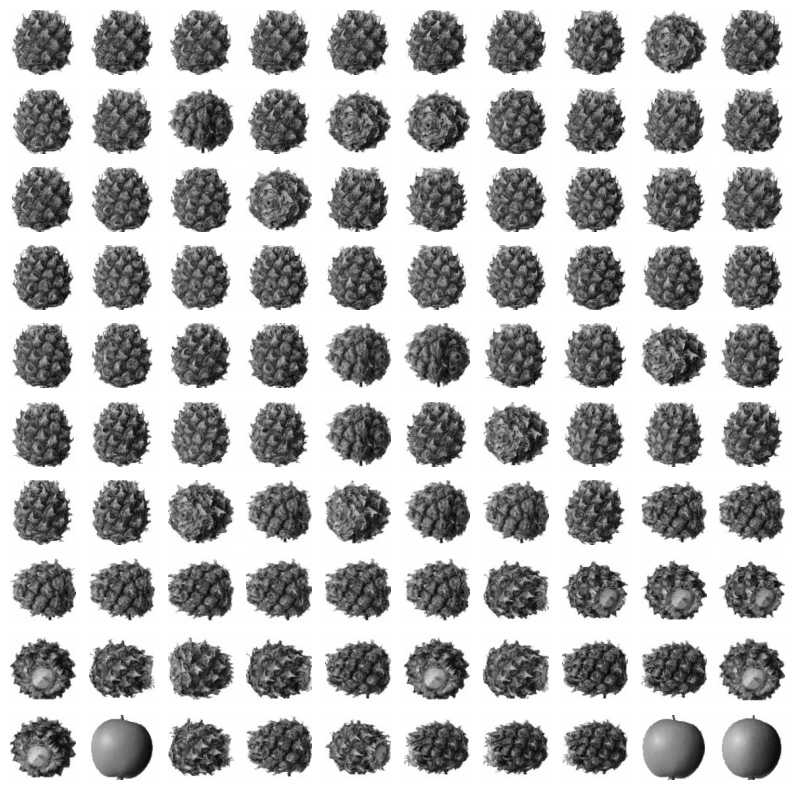

In [51]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2)) 
pineapple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()